In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Load data

In [38]:
data = '../data/cleaned/sales_cleaned.csv'
df_cleaned = pd.read_csv(data).drop(columns='Unnamed: 0')

Adding columns and analyzing them

In [39]:
### Add total_price column
df_cleaned['priceTotal'] = df_cleaned['quantity'] * df_cleaned['priceEach']
df_cleaned

,orderID,product,quantity,priceEach,orderDate,purchaseAddress,priceTotal
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...
185681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97
185682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00
185683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00
185684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99


In [40]:
df_grouped = df_cleaned.groupby('orderID').size().reset_index(name='orderCount')
df_duplicated = df_grouped[df_grouped['orderCount'] > 1]
df_joined = df_cleaned.merge(df_duplicated, on='orderID', how='inner')
# Mostrar solo las filas con Order ID duplicados
df_joined[df_joined['orderCount'] > 3][0:10]

,orderID,product,quantity,priceEach,orderDate,purchaseAddress,priceTotal,orderCount
1370,193511,Google Phone,1,600.00,2019-04-21 11:14:00,"821 Elm St, Austin, TX 73301",600.00,4
1371,193511,USB-C Charging Cable,2,11.95,2019-04-21 11:14:00,"821 Elm St, Austin, TX 73301",23.90,4
1372,193511,Bose SoundSport Headphones,1,99.99,2019-04-21 11:14:00,"821 Elm St, Austin, TX 73301",99.99,4
1373,193511,Wired Headphones,1,11.99,2019-04-21 11:14:00,"821 Elm St, Austin, TX 73301",11.99,4
1893,242936,iPhone,1,700.00,2019-08-14 09:27:00,"984 14th St, Austin, TX 73301",700.00,4
1894,242936,Lightning Charging Cable,2,14.95,2019-08-14 09:27:00,"984 14th St, Austin, TX 73301",29.90,4
1895,242936,Apple Airpods Headphones,1,150.00,2019-08-14 09:27:00,"984 14th St, Austin, TX 73301",150.00,4
1896,242936,Wired Headphones,1,11.99,2019-08-14 09:27:00,"984 14th St, Austin, TX 73301",11.99,4
2328,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",600.00,4
2329,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",11.95,4


Some plots

c:\Users\Felipe\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Felipe\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


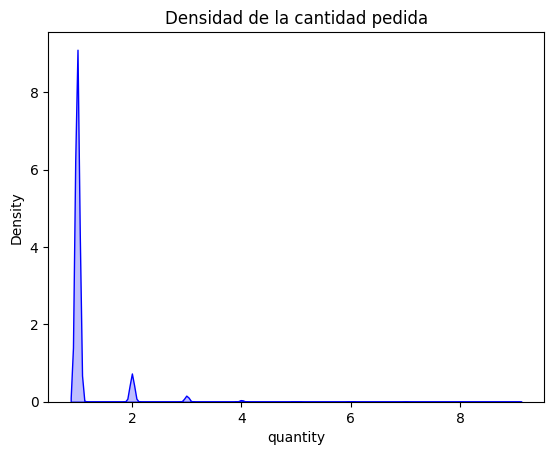

In [41]:
sns.kdeplot(data=df_cleaned.quantity, fill=True, color="b")
plt.title("Densidad de la cantidad pedida")
plt.show()

c:\Users\Felipe\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Felipe\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Felipe\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Felipe\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

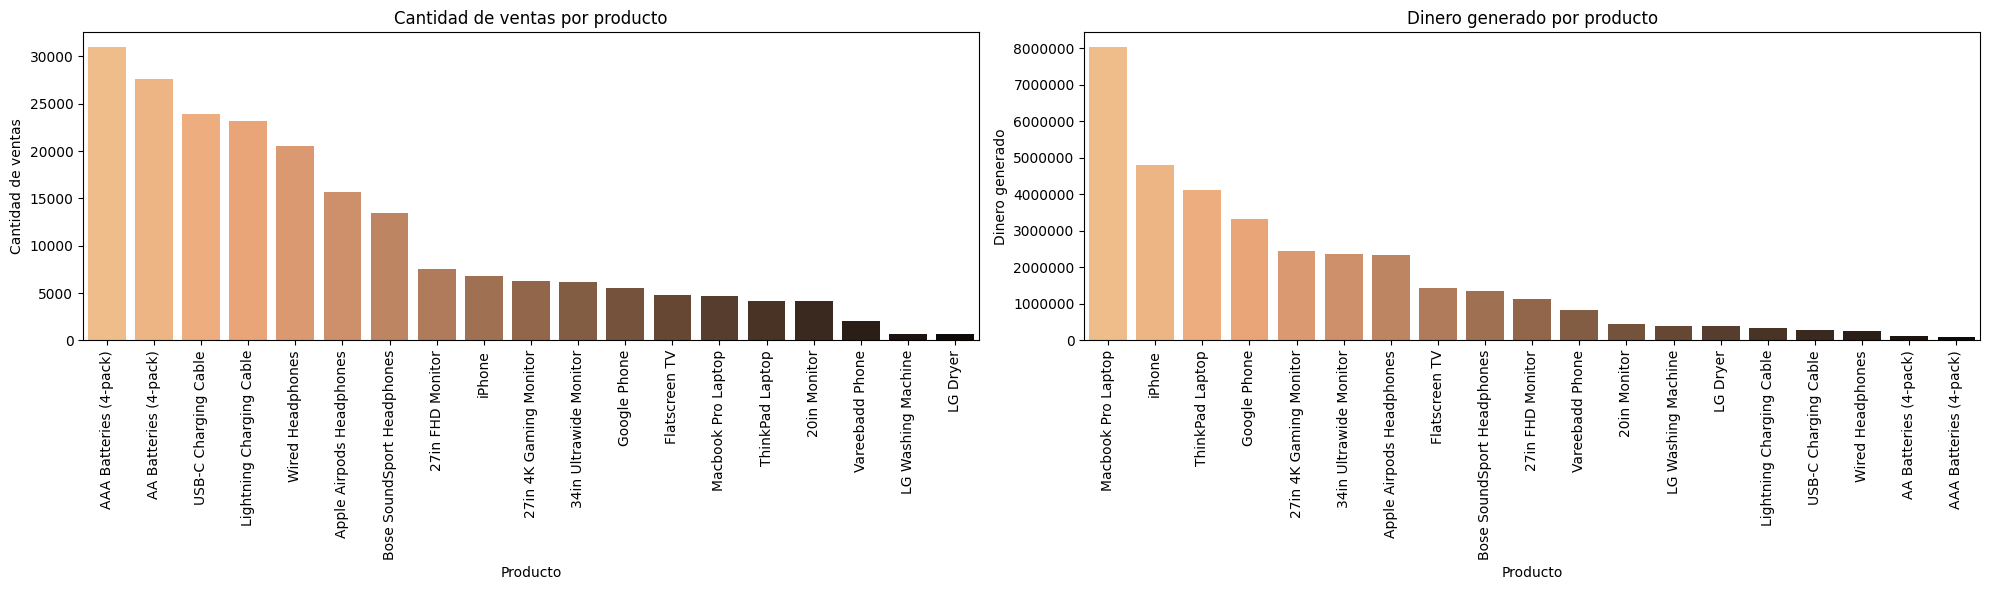

In [71]:
# Crear una figura y ejes para las subparcelas
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Cantidad de ventas por producto
df_sales = df_cleaned.groupby('product')['quantity'].sum().reset_index()
df_sales_sorted = df_sales.sort_values(by='quantity', ascending=False)

# Graficar la cantidad de ventas por producto
sns.barplot(data=df_sales_sorted, x='product', y='quantity', order=df_sales_sorted['product'], palette='copper_r', ax=axes[0])
axes[0].set_title('Cantidad de ventas por producto')
axes[0].set_xlabel('Producto')
axes[0].set_ylabel('Cantidad de ventas')
axes[0].tick_params(axis='x', rotation=90)

# Dinero generado por producto
df_revenue = df_cleaned.groupby('product')['priceTotal'].sum().reset_index()
df_revenue_sorted = df_revenue.sort_values(by='priceTotal', ascending=False)

# Graficar el dinero generado por producto
sns.barplot(data=df_revenue_sorted, x='product', y='priceTotal', order=df_revenue_sorted['product'], palette='copper_r', ax=axes[1])
axes[1].set_title('Dinero generado por producto')
axes[1].set_xlabel('Producto')
axes[1].set_ylabel('Dinero generado')
axes[1].tick_params(axis='x', rotation=90)

# Desactivar la notación científica en el eje y de la segunda subparcela
axes[1].ticklabel_format(style='plain', axis='y')

# Ajustar el espacio entre las subparcelas
plt.tight_layout()

plt.show()


Save

In [75]:
df_cleaned.to_csv('../data/analyzed/sales_analyzed.csv')